In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns =iris.feature_names)
#df['species'] = iris.target

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


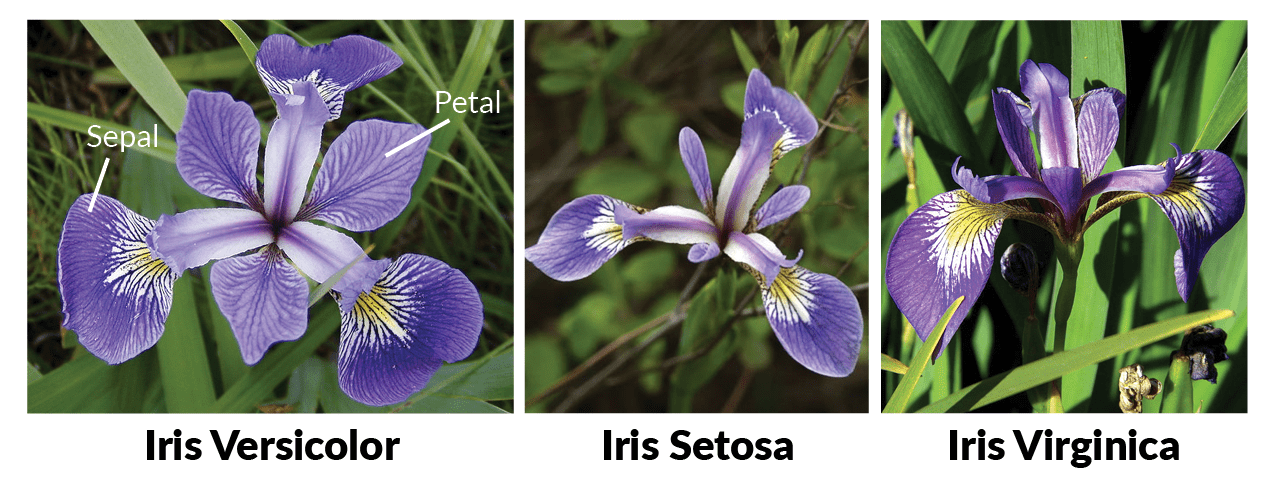

In [ ]:
#check missing values with isnull().any()
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

In [ ]:
# Get statistical summary using df.describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


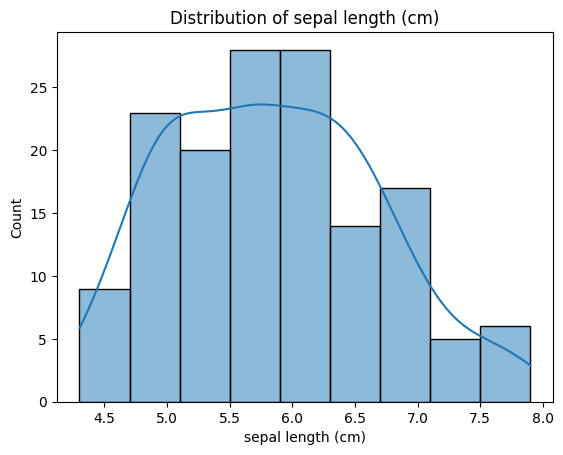

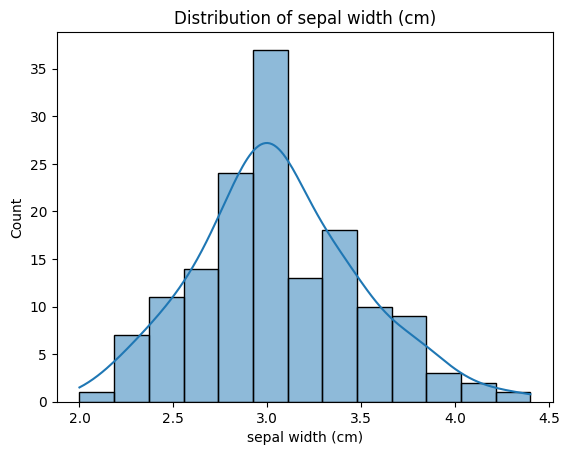

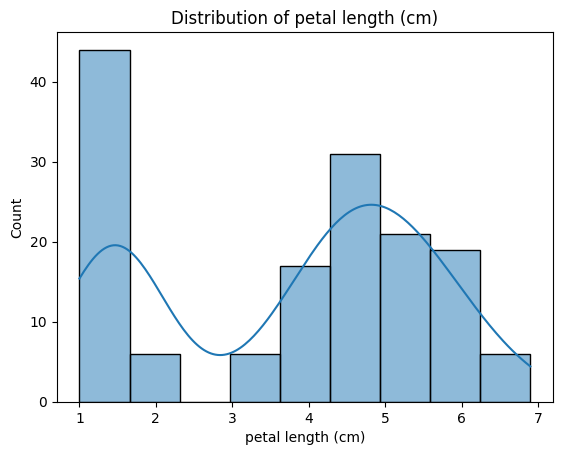

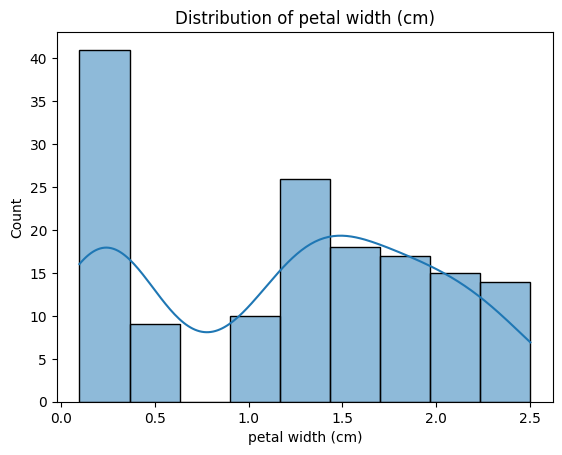

In [ ]:
for column in df.columns[:-1]:
  sns.histplot(df[column], kde =True)
  plt.title(f'Distribution of {column}')
  plt.show()

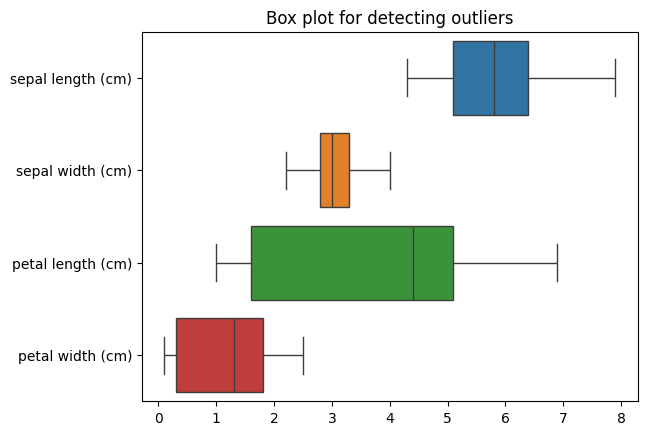

In [ ]:
# Check outlier with box plot sns.boxplot(data=df, orient="h")

sns.boxplot(data=df, orient = 'h')
plt.title("Box plot for detecting outliers")
plt.show()

In [ ]:
# Filter out outliers and keep only the valid data

column = 'sepal width (cm)'

# Calculate Q1, Q3 and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Train Test Split

In [ ]:
feature_columns = iris.feature_names  # This list contains the names of the feature columns
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['species'], test_size=0.2)

In [ ]:
# Perform Scaling
#fit training data with scaler.fit(training data) with StandardScaler() instance
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.03947637,  0.47620374,  0.56371458,  0.76450786],
       [ 0.97881162,  0.21563943,  0.50615218,  0.36503528],
       [-0.31277434, -0.30548919, -0.12703427,  0.09872023],
       [ 1.33106234,  0.47620374,  0.50615218,  0.23187776],
       [ 1.21364544,  0.21563943,  0.7364018 ,  1.43029548],
       [ 0.39172709, -0.30548919,  0.27590256,  0.09872023],
       [-1.01727578,  0.99733236, -1.27828236, -1.09969749],
       [-0.19535744, -1.34774643,  0.67883939,  1.03082291],
       [ 0.74397781, -0.5660535 ,  0.44858977,  0.36503528],
       [-0.19535744, -0.30548919,  0.21834016,  0.09872023],
       [-0.54760816,  0.99733236, -1.22071996, -1.36601254],
       [-0.89985888, -1.34774643, -0.4724087 , -0.16759482],
       [ 0.6265609 ,  0.47620374,  0.85152661,  1.43029548],
       [ 0.97881162,  0.73676805,  1.08177622,  1.16398043],
       [-0.78244197,  0.99733236, -1.39340717, -1.36601254],
       [ 0.6265609 , -0.5660535 ,  1.02421382,  1.29713795],
       [-1.13469269,  0.

# Train the model

In [ ]:
# model call and model fit
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

# Test the model

In [ ]:
y_pred = model.predict(X_test_scaled)  # Make predictions on the test set (X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is {accuracy}")

cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model is 0.9
Confusion Matrix:
[[11  0  0]
 [ 0  7  1]
 [ 0  2  9]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.78      0.88      0.82         8
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



Confusion Matrix:
            setosa  versicolor  virginica
setosa          11           0          0
versicolor       0           7          1
virginica        0           2          9


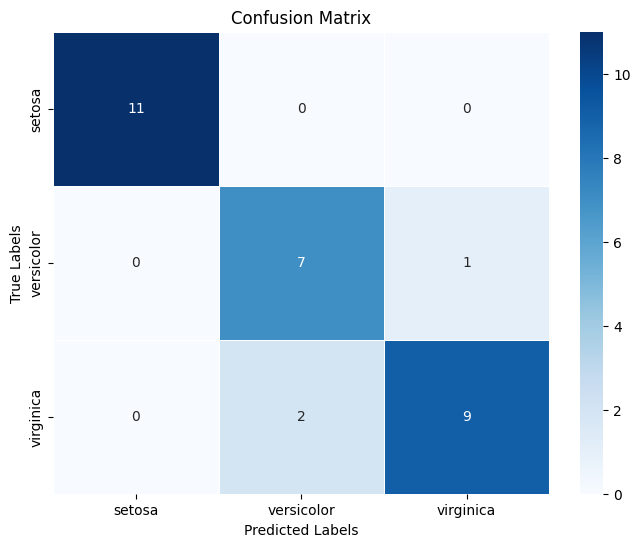

In [ ]:
cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
print("Confusion Matrix:")
print(cm_df)

# Visualize using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', linewidths=.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()